In [1]:
import openmc

In [2]:
model = openmc.model.Model()

uo2 = openmc.Material(name='UO2')
uo2.set_density('g/cm3', 10.0)
uo2.add_nuclide('U235', 1.0)
uo2.add_nuclide('O16', 2.0)
water = openmc.Material(name='light water')
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
model.materials.extend([uo2, water])

rc = 0.4
h1 = 1.0
h2 = 2.0
h_avg = (h1 + h2) / 2
cyl = openmc.ZCylinder(r=rc)
top1 = openmc.ZPlane(z0=h1)
top2 = openmc.ZPlane(z0=h2)
bottom = openmc.ZPlane(z0=0.)
pellet1 = -cyl & -top1 & +bottom
pellet2 = -cyl & -top2 & +bottom
water_slice1 = +cyl & -top1 & +bottom
water_slice2 = +cyl & -top2 & +bottom

fuel1 = openmc.Cell(fill=uo2, region=pellet1)
fuel2 = openmc.Cell(fill=uo2, region=pellet2)
water_reflector1 = openmc.Cell(fill=water, region=water_slice1)
water_reflector2 = openmc.Cell(fill=water, region=water_slice2)
layer1 = openmc.Universe(cells=[fuel1, water_reflector1])
layer2 = openmc.Universe(cells=[fuel2, water_reflector2])


n_pellets = 200

top = openmc.ZPlane(z0 = n_pellets * h_avg)
tb_refl = openmc.Cell(fill=water, region=-bottom | +top)

d = 1.5 * rc
box = openmc.model.RectangularParallelepiped(-d, d, -d, d, 0. - d,
                                           n_pellets * h_avg + d,
                                           boundary_type='reflective')
#outer_cell = openmc.Cell(fill=water, region=+box)

univs = [layer1, layer2] * int(n_pellets / 2)
pellet_stack = openmc.StackLattice()
pellet_stack.central_axis = (0., 0.)
pellet_stack.base_coordinate = 0.
pellet_stack.universes = univs
pellet_stack.is_uniform = False

pellet_stack.pitch = [h1, h2] * int(n_pellets / 2)
#pellet_stack.outer = openmc.Universe(cells=[outer_cell])

stack_cell = openmc.Cell(fill=pellet_stack)

pin_univ = openmc.Universe(cells=[stack_cell, tb_refl])

main_cell = openmc.Cell(fill=pin_univ, region=-box)
model.geometry = openmc.Geometry([main_cell])

model.settings.batches = 10
model.settings.inactive = 5
model.settings.particles = 1000

model.export_to_xml()

In [21]:
pellet_stack.num_layers

1

In [22]:
pellet_stack.pitch

[1.0]

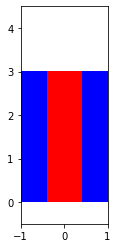

In [3]:
pin_univ.plot(pixels=[50,50],width=(2.,5.), origin=(0.,0.,2.), basis='xz', color_by='material', colors={uo2: 'red', water: 'blue'})

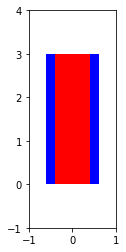

In [4]:
import pdb
pdb.traceback
model.geometry.root_universe.plot(pixels=[50,50], width=(2.,5.), origin=(0.,0.,1.5), basis='xz', color_by='material', colors={uo2: 'red', water: 'blue'})

In [3]:
pellet_stack._layer_boundabries

array([0., 1., 3.])

In [5]:
n_pellets * h_avg + d

2.6

In [ ]:
pellet_stack._universes

In [ ]:
pellet_stack._orientation_idx

In [3]:
plotxy = openmc.Plot()
plotxy.basis = 'xy'
plotxy.origin = (0., 0., 1.)
plotxy.width = (5., 5.)
plotxy.pixels = (400, 400)
plotxy.color_by = 'material'

plotxy.colors = {
    uo2: 'red',
    water: 'blue'
}
plotxy.filename = 'xy'

plotxz = openmc.Plot()
plotxz.basis = 'xz'
plotxz.origin = (0., 0., 1.)
plotxz.width = (5., 5.)
plotxz.pixels = (400, 400)
plotxz.color_by = 'material'

plotxz.colors = {
    uo2: 'red',
    water: 'blue'
}
plotxz.filename = 'xz'

plots = openmc.Plots([plotxy, plotxz])
plots.export_to_xml()

In [ ]:
model.export_to_xml()

In [ ]:
pellet_stack

In [ ]:
(-1 - 0) / 1.5

In [3]:
sp = openmc.StatePoint('statepoint.10.h5')

In [4]:
sp.k_combined

1.8508013152353244+/-0.005892614515898528